In [1]:
import numpy as np
import matplotlib.pyplot as plt

from functools import reduce

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn.model_selection  import train_test_split
from sklearn.metrics import precision_recall_curve

import rocpr

np.set_printoptions(suppress=True)

In [2]:
ds = datasets.load_breast_cancer()
X = ds.data
y = ds.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [3]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
probe_predicts = model.predict_proba(X_test)
predicts = model.predict(X_test) 
probe_predicts[:, 1] = y_test  
probe_predicts = sorted(probe_predicts, key=lambda x: -x[0])

In [4]:
zeros = reduce(lambda x, y: (x + 1) if y[1] == 0 else x, probe_predicts, 0)
ones = reduce(lambda x, y: (x + 1) if y[1] == 1 else x, probe_predicts, 0)
print("Zeros: " + str(zeros))
print("Ones: " + str(ones))

Zeros: 63
Ones: 108


Area ROC = 0.97


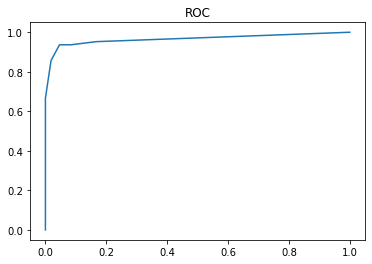

Area ROCSTEP = 0.97


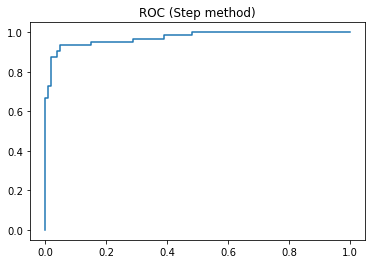

Area PR = 0.97


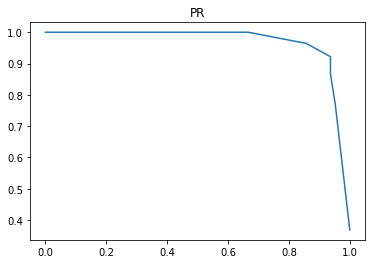

In [5]:
rocpr.ROC(probe_predicts)
rocpr.ROCSTEP(probe_predicts)
rocpr.PR(probe_predicts)

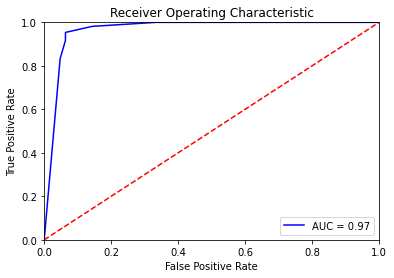

In [6]:
probe_predicts = model.predict_proba(X_test)
predicts = model.predict(X_test) 
probe_predicts[:, 0] = y_test  

fpr, tpr, threshold = metrics.roc_curve(np.array(probe_predicts)[:, 0], np.array(probe_predicts)[:, 1])
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

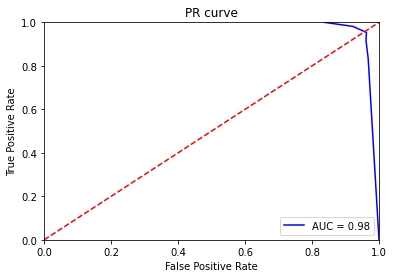

In [7]:
precision, recall, thresholds = metrics.precision_recall_curve(np.array(probe_predicts)[:, 0], np.array(probe_predicts)[:, 1])
pr_auc = metrics.auc(recall, precision)
plt.title('PR curve')
plt.plot(precision, recall, 'b', label = 'AUC = %0.2f' % pr_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()